# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import datetime

PREGUNTAS

¿en que momento del año se alquilan mas bicicletas?

Influye soleado o nubes?

Fin de semana o laborable?

los primeros y ultimos dias del mes hay mas reservas?

festivos aumenta las reservas?

la tempreatura a partir de la cual disminuye los alquileres  ->Punto ruptura

Punto maximo de alquiler

la temperatura alta influye al alquiler de espontaneos o habituales?

la humedad es un punto clave en algun momento? A partir de que punto de humedad bajan drasticamente las reservas?

fecha donde hay mas y menos reservas






In [29]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
622,623,15-09-2019,autumn,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
425,426,02-03-2019,spring,1,3,0,5,1,2,14.486653,17.99210,65.7083,9.708568,246,2948,3194
64,65,06-03-2018,spring,0,3,0,0,0,2,15.437402,18.31260,94.8261,23.000229,114,491,605
255,256,13-09-2018,autumn,0,9,0,2,1,1,26.684153,30.17770,71.2500,9.500868,701,4062,4763
538,539,23-06-2019,autumn,1,6,0,6,0,1,29.998347,32.63960,53.4583,12.041307,2657,4801,7458
46,47,16-02-2018,spring,0,2,0,3,1,1,13.048701,15.81000,42.3478,16.869997,218,1897,2115


In [30]:
df_bike.mnth.dtype

dtype('int64')

# limpieza string

In [31]:
df_bike.season.unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

# duplicados

In [32]:
df_bike.duplicated().sum()

0

# Nulos

In [33]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [34]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


# separando la col DTime en day, month, year

In [35]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [36]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [37]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [38]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

In [39]:
df_bike["day"].dtypes

dtype('O')

In [40]:
df_bike["day"] =df_bike["day"].astype("int64")

In [41]:
df_bike["day"].dtypes

dtype('int64')

In [42]:
df_bike.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [43]:
df_bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [44]:
df_bike.stb.counts().T

,workingday,yr,holiday,weathersit,season,weekday,mnth,day,temp,hum,casual,windspeed,registered,atemp,cnt,dteday,instant
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
unique,2,2,2,3,4,7,12,31,498,594,605,649,678,689,695,730,730
most_freq,1,0,0,1,autumn,6,1,1,26.035,61.3333,120,9.041918,4841,32.7344,5409,01-01-2018,1
most_freq_count,499,365,709,463,188,105,62,24,5,4,4,3,3,4,2,1,1
least_freq,0,0,1,3,winter,3,2,31,10.865,79.7083,2290,4.417256,3100,26.3571,5740,01-01-2018,1
least_freq_count,231,365,21,21,178,103,56,14,1,1,1,1,1,1,1,1,1


In [45]:
df_weekday= df_bike.groupby("weekday"), 
df_weekday

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f77c4087c40>,)

In [46]:
df_weekday= df_bike.isin()

TypeError: isin() missing 1 required positional argument: 'values'

In [47]:
frecuentes= df["Name"].value_counts()[0:50]
frecuentes

NameError: name 'df' is not defined

In [ ]:
values = frecuentes.keys().to_list()
values

In [ ]:
df_name = df[df["Name"].isin(values)]
df_name

# Corregir columna season

In [48]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [49]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [50]:
df_bike['season_2'] = df_bike['dteday'].apply(meses)

In [51]:
df_bike.sample(5)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
293,294,2018-10-21,winter,0,10,21,0,5,1,1,17.527500,21.17980,57.4167,14.833532,676,3628,4304,autumn
533,534,2019-06-18,summer,1,6,18,0,1,1,2,23.301653,27.24210,77.7917,11.707982,653,4446,5099,spring
375,376,2019-11-01,spring,1,1,11,0,3,1,2,11.240847,14.14105,84.7500,8.791807,92,2085,2177,autumn
527,528,2019-12-06,summer,1,6,12,0,2,1,2,26.786653,29.89375,83.3333,14.374582,477,4495,4972,autumn
220,221,2018-09-08,autumn,0,8,9,0,2,1,1,31.775000,36.20605,57.0417,10.125107,907,3695,4602,summer


Ahora que la columna season ha sido corregida, ¿qué hacemos con la columna original? ¿La eliminamos? 
 - Antes de codificarla hacemos una gráfica para ver cómo se reparte el alquiler de bicicletas durante las estaciones.

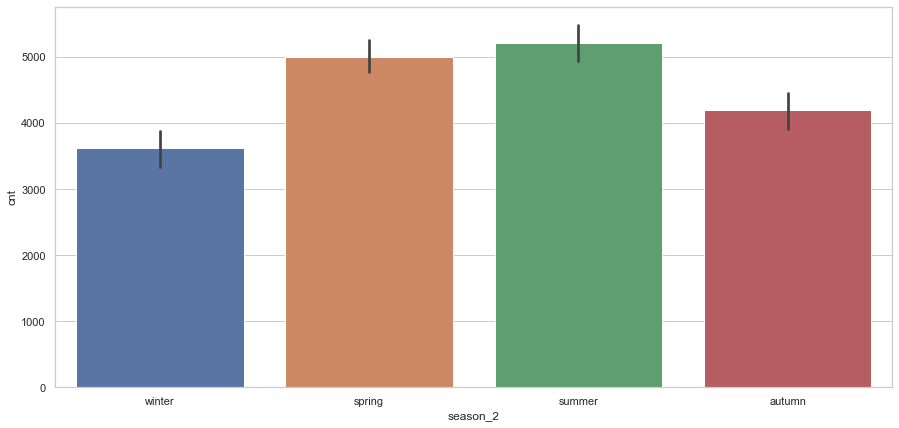

In [52]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="cnt", data=df_bike)

# Tabla viento: encoding

In [53]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=[0,1,2,3,4], ordered=True)

In [54]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('int64')

 - Al utilizar el método pd.cut nos devuelve una columna categórica, por eso lo cambiamos a tipo int64. Ahora ya tenemos codificada esta columna.

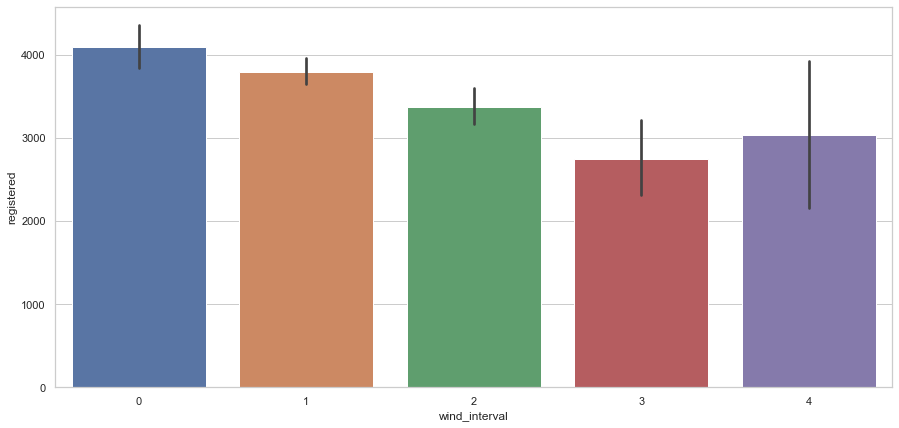

In [56]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="wind_interval", y="registered", data=df_bike)

# definir categoricas y numericas
# .reindex las columnas a gusto o uso
# .describe
# .stb.counts()
# .stb.missing()
# pairplot - Busca relaciones - ¿Hay que hacer algun ajuste?
# Boxplot
# Outliers - Identificarlos ¿Que hacer con ellos? %de cada columna
# Heatmap con la relacion
# ajuste lineal multiple
